In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [10]:
#update  y into 2d array
y = y.reshape(len(y), 1)

# Feature scaling:
`in svr there is no explict equation of the dependent variable with respect with the features`

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x= sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [12]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [13]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Trainnin the SVR model on the whole dataset

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Radial basis function
regressor.fit(x, y)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Reverse the transfomation and predict the result

In [19]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

# Visualising the REsults of the SVR results

[]

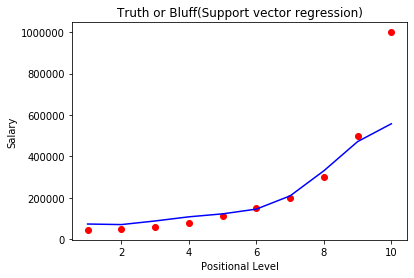

In [24]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y),    color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff(Support vector regression)')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.plot()

# Visualising the result (for higher resolution and smoother curve)

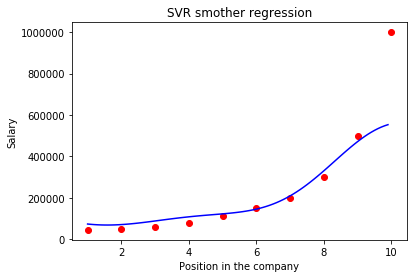

In [25]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('SVR smother regression')
plt.xlabel('Position in the company')
plt.ylabel('Salary')
plt.show()
